### Bandas de Bollinger para Ação Selecionada

In [ ]:
!pip install mplfinance

#### Bibliotecas

In [1]:
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

#### Análise

In [2]:
dados = yf.Ticker('BBAS3.SA').history(period='1y')

In [3]:
# número de dias para cálculo da média móvel e do desvio padrão, caso nenhum valor seja passado quando chamar a função, 
# vamos assumir o cálculo com uma janela de 20 dias
def bollinger(preco, janela=20):
    desvio_padrao = preco.rolling(janela).std()
    media_movel_simples = preco.rolling(janela).mean()
    
    banda_superior = media_movel_simples + (2*desvio_padrao)
    banda_inferior = media_movel_simples - (2*desvio_padrao)
    
    return banda_superior, banda_inferior  

In [4]:
dados['Bollinger Superior'], dados['Bollinger Inferior'] = bollinger(dados['Close'])

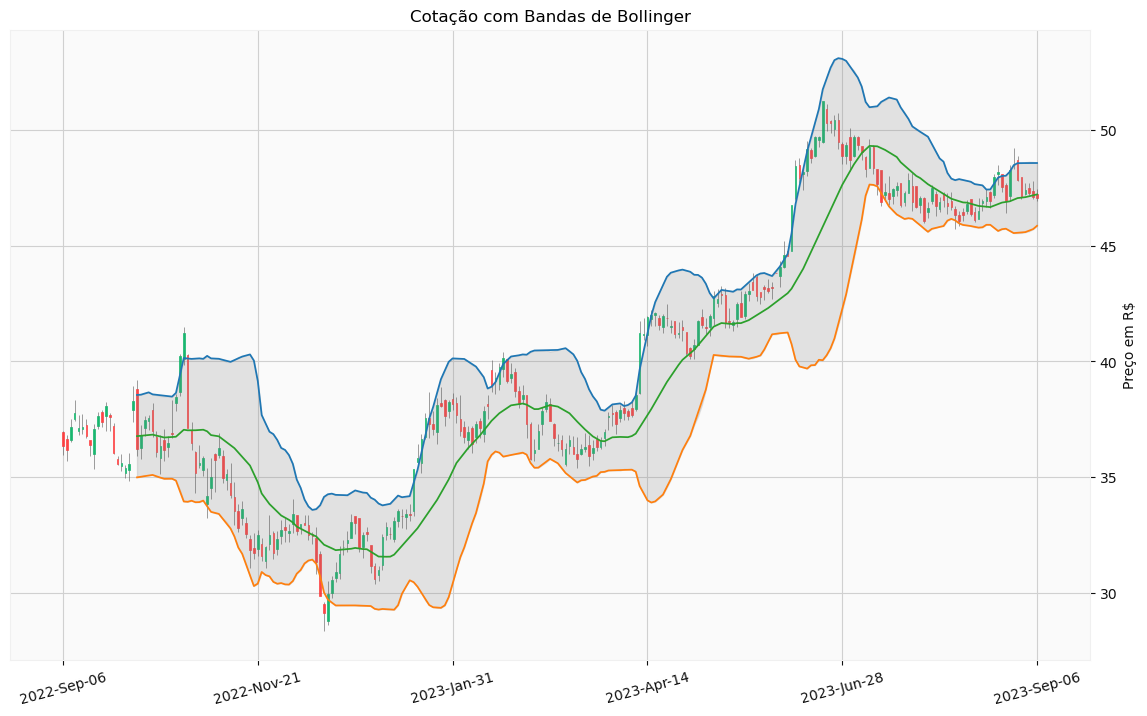

In [5]:
banda_superior = mpf.make_addplot(dados['Bollinger Superior'])
banda_inferior = mpf.make_addplot(dados['Bollinger Inferior'])
banda_media = mpf.make_addplot(dados['Close'].rolling(20).mean())

mpf.plot(dados, type='candle', 
         style='yahoo', 
         addplot=[banda_superior, banda_inferior, banda_media], 
         axtitle='Cotação com Bandas de Bollinger', 
         ylabel='Preço em R$', 
         xrotation=15, 
         fill_between=dict(y1=dados['Bollinger Superior'].values, y2=dados['Bollinger Inferior'].values, color='gray', alpha=0.2), 
         figsize=(15,9))